In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
from matplotlib import cm

In [2]:
def calculate_cumulative_angle(
    gyro_df: pd.DataFrame, time_unit: float = 0.7
) -> pd.DataFrame:
    sample_freq = 100
    window_gayo = 10
    gyro_df["time_unit"] = (gyro_df["t"] / time_unit).astype(int)

    gyro_df["norm"] = (gyro_df["x"] ** 2 + gyro_df["y"] ** 2 + gyro_df["z"] ** 2) ** (
        1 / 2
    )
    gyro_df["angle"] = np.cumsum(gyro_df["x"]) / sample_freq
    gyro_df["low_x"] = gyro_df["x"].rolling(window=window_gayo).mean()
    gyro_df["angle_x"] = gyro_df["angle"].rolling(
        window=window_gayo, center=True
    ).mean() * (180 / np.pi)

    angle_df = (
        gyro_df.groupby("time_unit")
        .apply(
            lambda df: pd.Series(
                {
                    "t": df["t"].iloc[0],  # 各グループの開始時間
                    "angle_x": np.trapz(df[f"angle_x"], df["t"]),
                }
            )
        )
        .reset_index(drop=True)
    )

    return angle_df


# 変化量を計算してデータフレームを返す関数
def calculate_angle_change(
    gyro_df: pd.DataFrame, time_unit: float = 0.7
) -> pd.DataFrame:
    angle_df = calculate_cumulative_angle(gyro_df, time_unit)
    angle_df["angle_change"] = angle_df["angle_x"].diff()
    angle_df = angle_df.dropna()  # 最初の変化量はNaNになるため削除

    change_df = angle_df[["t", "angle_change"]]
    change_df = change_df.reset_index(drop=True)

    return change_df

In [3]:
gyro_df = pd.read_csv("data/07/gyroscope.csv")

angle_df = calculate_cumulative_angle(gyro_df)
change_angle_df = calculate_angle_change(gyro_df)

print(change_angle_df)
print(angle_df)

             t  angle_change
0      1.40169      3.881088
1      2.10169     -0.991402
2      2.80169     -1.415010
3      3.50169      0.644788
4      4.20169     -0.891061
..         ...           ...
173  122.50169      1.317262
174  123.20169     -0.506553
175  123.90169      1.065944
176  124.60169     -4.786113
177  125.30169     -0.576707

[178 rows x 2 columns]
             t     angle_x
0      0.04169         NaN
1      0.70169    1.025572
2      1.40169    4.906660
3      2.10169    3.915257
4      2.80169    2.500247
..         ...         ...
176  123.20169  618.781332
177  123.90169  619.847277
178  124.60169  615.061164
179  125.30169  614.484457
180  126.00169         NaN

[181 rows x 2 columns]


/var/folders/1w/52jfb36j6sg557p8z_gknglh0000gn/T/ipykernel_52347/1276906265.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  "angle_x": np.trapz(df[f"angle_x"], df["t"]),
/var/folders/1w/52jfb36j6sg557p8z_gknglh0000gn/T/ipykernel_52347/1276906265.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(
/var/folders/1w/52jfb36j6sg557p8z_gknglh0000gn/T/ipykernel_52347/1276906265.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  "angle_x": np.trapz(df[f"angle_x"], df["t"]),
/var/folders/1w/52jfb36j6sg557p8z_

<Figure size 640x480 with 0 Axes>

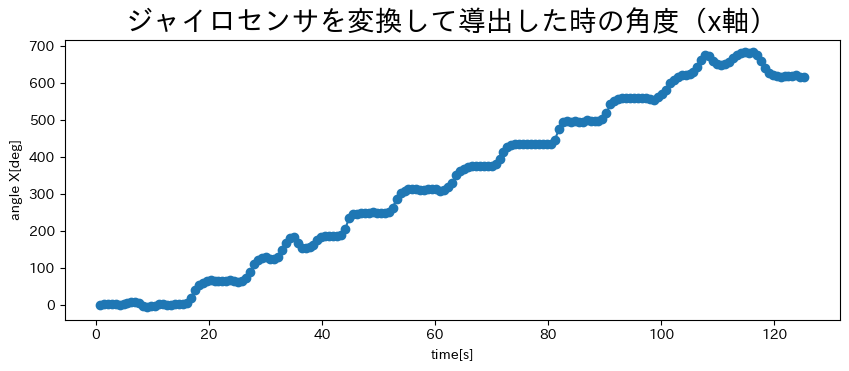

<Figure size 640x480 with 0 Axes>

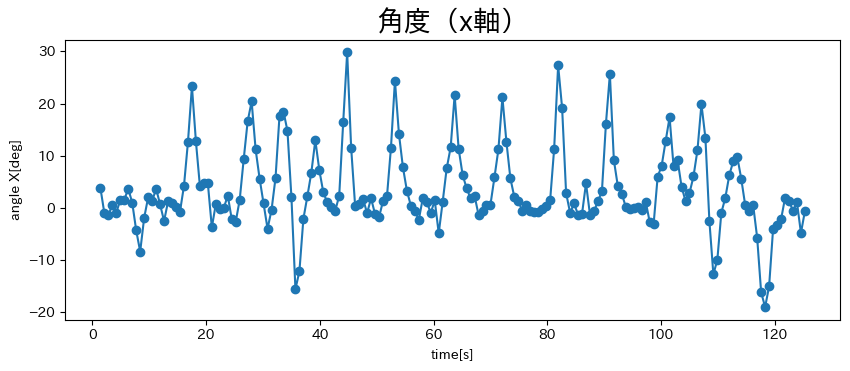

In [4]:
import matplotlib.pyplot as plt


plt.subplots_adjust(hspace=0.3)
fig = plt.figure(figsize=(10, 8))

# 累積角度（x軸）のプロット（線と点）
ax3 = fig.add_subplot(2, 1, 2)
ax3.plot(angle_df["t"], angle_df["angle_x"], marker="o")  # 点を追加
ax3.set_title("ジャイロセンサを変換して導出した時の角度（x軸）", fontsize=20)
ax3.set_xlabel("time[s]")
ax3.set_ylabel("angle X[deg]")  # 角度を度に変換しているため単位を変更

plt.show()


plt.subplots_adjust(hspace=0.3)
fig = plt.figure(figsize=(10, 8))

# 累積角度（x軸）のプロット（線と点）
ax4 = fig.add_subplot(2, 1, 2)
ax4.plot(change_angle_df["t"], change_angle_df["angle_change"], marker="o")  # 点を追加
ax4.set_title("角度（x軸）", fontsize=20)
ax4.set_xlabel("time[s]")
ax4.set_ylabel("angle X[deg]")  # 角度を度に変換しているため単位を変更

plt.show()